<a href="https://colab.research.google.com/github/stanimman/Fast_ai/blob/master/Lesson%205%20Language%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.0.0
True


In [0]:
!pip -q uninstall Pillow -y

!pip -q install Pillow

In [8]:
import PIL
print(PIL.PILLOW_VERSION)
import sys

5.4.1


In [3]:
!wget http://files.fast.ai/data/aclImdb.tgz

--2019-01-28 13:08:28--  http://files.fast.ai/data/aclImdb.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145982645 (139M) [text/plain]
Saving to: ‘aclImdb.tgz’

aclImdb.tgz         100%[===================>] 139.22M  16.2MB/s    in 10s     

2019-01-28 13:08:38 (13.9 MB/s) - ‘aclImdb.tgz’ saved [145982645/145982645]



In [0]:
#!ls
!tar -xvzf aclImdb.tgz

In [9]:
!ls

aclImdb  aclImdb.tgz  sample_data


In [10]:
PATH='aclImdb/'

TRN_PATH = 'train/all/'
VAL_PATH = 'test/all/'
TRN = f'{PATH}{TRN_PATH}'
VAL = f'{PATH}{VAL_PATH}'

%ls {PATH}

imdbEr.txt  imdb.vocab  README  test/  train/


In [11]:
trn_files = !ls {TRN}
trn_files[:10]

['0_0.txt       1562_10.txt  24997_0.txt\t34371_0.txt  43748_0.txt  6248_7.txt',
 '0_3.txt       15621_0.txt  24998_0.txt\t3437_1.txt   43749_0.txt  6249_0.txt',
 '0_9.txt       1562_1.txt   24999_0.txt\t34372_0.txt  437_4.txt\t  6249_2.txt',
 '10000_0.txt   15622_0.txt  25000_0.txt\t34373_0.txt  43750_0.txt  6249_7.txt',
 '10000_4.txt   15623_0.txt  2500_0.txt\t34374_0.txt  4375_0.txt   624_9.txt',
 '10000_8.txt   15624_0.txt  25001_0.txt\t34375_0.txt  43751_0.txt  6250_0.txt',
 '1000_0.txt    15625_0.txt  2500_1.txt\t34376_0.txt  4375_1.txt   6250_10.txt',
 '10001_0.txt   15626_0.txt  25002_0.txt\t34377_0.txt  43752_0.txt  6250_1.txt',
 '10001_10.txt  15627_0.txt  25003_0.txt\t34378_0.txt  43753_0.txt  625_0.txt',
 '10001_4.txt   15628_0.txt  25004_0.txt\t3437_8.txt   43754_0.txt  625_10.txt']

In [12]:
review = !cat {TRN}{trn_files[6]}
review[0]

"I have to say when a name like Zombiegeddon and an atom bomb on the front cover I was expecting a flat out chop-socky fung-ku, but what I got instead was a comedy. So, it wasn't quite was I was expecting, but I really liked it anyway! The best scene ever was the main cop dude pulling those kids over and pulling a Bad Lieutenant on them!! I was laughing my ass off. I mean, the cops were just so bad! And when I say bad, I mean The Shield Vic Macky bad. But unlike that show I was laughing when they shot people and smoked dope.<br /><br />Felissa Rose...man, oh man. What can you say about that hottie. She was great and put those other actresses to shame. She should work more often!!!!! I also really liked the fight scene outside of the building. That was done really well. Lots of fighting and people getting their heads banged up. FUN! Last, but not least Joe Estevez and William Smith were great as the...well, I wasn't sure what they were, but they seemed to be having fun and throwing out 

In [0]:
!rm -rf  Fast_ai # - Remove the Fastai file

In [0]:
'''from IPython.lib.deepreload import reload as dreload
import PIL, os, numpy as np, math, collections, threading, json,  random, scipy, cv2
import pandas as pd, pickle, sys, itertools, string, sys, re, datetime, time, shutil, copy
import seaborn as sns, matplotlib
import IPython, graphviz, sklearn_pandas, sklearn, warnings, pdb
import contextlib
from abc import abstractmethod
from glob import glob, iglob
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from itertools import chain
from functools import partial
from collections import Iterable, Counter, OrderedDict
from isoweek import Week
from pandas_summary import DataFrameSummary
from IPython.lib.display import FileLink
from PIL import Image, ImageEnhance, ImageOps
from sklearn import metrics, ensemble, preprocessing
from operator import itemgetter, attrgetter
from pathlib import Path
from distutils.version import LooseVersion

from matplotlib import pyplot as plt, rcParams, animation
from ipywidgets import interact, interactive, fixed, widgets
matplotlib.rc('animation', html='html5')
np.set_printoptions(precision=5, linewidth=110, suppress=True)

from ipykernel.kernelapp import IPKernelApp
def in_notebook(): return IPKernelApp.initialized()

def in_ipynb():
    try:
        cls = get_ipython().__class__.__name__
        return cls == 'ZMQInteractiveShell'
    except NameError:
        return False

import tqdm as tq
from tqdm import tqdm_notebook, tnrange

def clear_tqdm():
    inst = getattr(tq.tqdm, '_instances', None)
    if not inst: return
    try:
        for i in range(len(inst)): inst.pop().close()
    except Exception:
        pass

if in_notebook():
    def tqdm(*args, **kwargs):
        clear_tqdm()
        return tq.tqdm(*args, file=sys.stdout, **kwargs)
    def trange(*args, **kwargs):
        clear_tqdm()
        return tq.trange(*args, file=sys.stdout, **kwargs)
else:
    from tqdm import tqdm, trange
    tnrange=trange
    tqdm_notebook=tqdm'''

"from IPython.lib.deepreload import reload as dreload\nimport PIL, os, numpy as np, math, collections, threading, json,  random, scipy, cv2\nimport pandas as pd, pickle, sys, itertools, string, sys, re, datetime, time, shutil, copy\nimport seaborn as sns, matplotlib\nimport IPython, graphviz, sklearn_pandas, sklearn, warnings, pdb\nimport contextlib\nfrom abc import abstractmethod\nfrom glob import glob, iglob\nfrom concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor\nfrom itertools import chain\nfrom functools import partial\nfrom collections import Iterable, Counter, OrderedDict\nfrom isoweek import Week\nfrom pandas_summary import DataFrameSummary\nfrom IPython.lib.display import FileLink\nfrom PIL import Image, ImageEnhance, ImageOps\nfrom sklearn import metrics, ensemble, preprocessing\nfrom operator import itemgetter, attrgetter\nfrom pathlib import Path\nfrom distutils.version import LooseVersion\n\nfrom matplotlib import pyplot as plt, rcParams, animation\nfrom ip

In [0]:
!pip install isoweek

In [0]:
!pip install sklearn_pandas

In [0]:
!pip install pandas_summary

In [0]:
import sys
sys.path.append('/content/Fast_ai')
from utils import *
from image_classification_from_csv import *
from structured import *
#import Fast_ai/

In [0]:
!wget http://files.fast.ai/part2/lesson14/rossmann.tgz 

--2019-01-18 06:36:10--  http://files.fast.ai/part2/lesson14/rossmann.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7730448 (7.4M) [text/plain]
Saving to: ‘rossmann.tgz’

rossmann.tgz        100%[===================>]   7.37M  28.9MB/s    in 0.3s    

2019-01-18 06:36:10 (28.9 MB/s) - ‘rossmann.tgz’ saved [7730448/7730448]



In [0]:
!ls

Fast_ai  rossmann.tgz  sample_data


In [0]:
!tar -xvzf rossmann.tgz

googletrend.csv
sample_submission.csv
state_names.csv
store.csv
store_states.csv
test.csv
train.csv
weather.csv


In [0]:
def concat_csvs(dirname):
    path = f'{PATH}{dirname}'
    filenames=glob(f"{PATH}/*.csv")

    wrote_header = False
    with open(f"{path}.csv","w") as outputfile:
        for filename in filenames:
            name = filename.split(".")[0]
            with open(filename) as f:
                line = f.readline()
                if not wrote_header:
                    wrote_header = True
                    outputfile.write("file,"+line)
                for line in f:
                     outputfile.write(name + "," + line)
                outputfile.write("\n")

In [0]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']

In [0]:
PATH = '/content/'
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [0]:
from IPython.display import HTML, display

In [0]:
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [0]:
#for t in tables: display(DataFrameSummary(t).summary()) # Issue with DataFrameSummary module

In [0]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [0]:
len(train),len(test)

(1017209, 41088)

In [0]:
(train.StateHoliday!='0').head()

0    False
1    False
2    False
3    False
4    False
Name: StateHoliday, dtype: bool

In [0]:
# We convert the State Holidays which is 1 & o as 'TRUE/FALSE' - boolen
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

In [0]:
train.StateHoliday.head()

0    False
1    False
2    False
3    False
4    False
Name: StateHoliday, dtype: bool

In [0]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [0]:
state_names.head()

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


In [0]:
weather = join_df(weather, state_names, "file", "StateName") # We are appending State Name abbrevation to the weather data

In [0]:
# we are getting Date / State Data from the google trend file and replace a a state info
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0] 
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. We'll add to every table with a date field.

In [0]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

In [0]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [0]:
googletrend.head()

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600


In [0]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [0]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [0]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [0]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [0]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [0]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [0]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [0]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [0]:
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [0]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [0]:
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [0]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [0]:
!pip install -U feather-format

    100% |████████████████████████████████| 11.6MB 4.2MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

In [0]:
!ls

Fast_ai		 rossmann.tgz		store.csv	  weather.csv
googletrend.csv  sample_data		store_states.csv
joined		 sample_submission.csv	test.csv
joined_test	 state_names.csv	train.csv


In [0]:
joined.to_csv(f'{PATH}joined')
joined_test.to_csv(f'{PATH}joined_test')

##Durations
It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:

**Running averages \
Time until next event \
Time since last event  ** \
This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. As such, we've created a class to handle this type of data.

We'll define a function get_elapsed for cumulative counting across a sorted dataframe. Given a particular field fld to monitor, this function will start tracking time since the last occurrence of that field. When the field is seen again, the counter is set to zero.

Upon initialization, this will result in datetime na's until the field is encountered. This is reset every time a new store is seen. We'll see how to use this shortly.

In [0]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [0]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [0]:
#df = train[columns]
df = train[columns].append(test[columns])

Let's walk through an example.

Say we're looking at School Holiday. We'll first sort by Store, then Date, and then call add_elapsed('SchoolHoliday', 'After'): This will apply to each row with School Holiday:

Sort  dataframe in order of store and date \
Will add to the dataframe the days since seeing a School Holiday \
If we sort in the other direction, this will count the days until another holiday.

In [0]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After') # After indicates after how many days you have a holiday ?
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before') # How long has it been since you have a holiday 

In [0]:
df.head(15)

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,False,0,13.0,NaN
856,2015-09-16,1,1,False,0,12.0,NaN
1712,2015-09-15,1,1,False,0,11.0,NaN
2568,2015-09-14,1,1,False,0,10.0,NaN
3424,2015-09-13,1,0,False,0,9.0,NaN
4280,2015-09-12,1,0,False,0,8.0,NaN
5136,2015-09-11,1,0,False,0,7.0,NaN
5992,2015-09-10,1,0,False,0,6.0,NaN
6848,2015-09-09,1,0,False,0,5.0,NaN
7704,2015-09-08,1,0,False,0,4.0,NaN


In [0]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
df.columns

Index(['Date', 'Store', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'AfterSchoolHoliday', 'BeforeSchoolHoliday', 'AfterStateHoliday',
       'BeforeStateHoliday', 'AfterPromo', 'BeforePromo'],
      dtype='object')

In [0]:
df = df.set_index("Date")

In [0]:
# Then set null values from elapsed field calculations to 0.
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [0]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

Next we'll demonstrate window functions in pandas to calculate rolling quantities. \ 

Here we're sorting by date (sort_index()) and counting the number of events of interest (sum()) defined in columns in the following week (rolling()), grouped by Store (groupby()). We do the same in the opposite direction.

In [0]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [0]:
bwd.head() # Rolling functionality indicaes the number of interesting event in rolling seven days period 

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2013-01-01    1.0            1.0           1.0    0.0
      2013-01-02    2.0            2.0           1.0    0.0
      2013-01-03    3.0            3.0           1.0    0.0
      2013-01-04    4.0            4.0           1.0    0.0
      2013-01-05    5.0            5.0           1.0    0.0

In [0]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [0]:
fwd.head()

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2015-09-17    1.0            0.0           0.0    1.0
      2015-09-16    2.0            0.0           0.0    2.0
      2015-09-15    3.0            0.0           0.0    3.0
      2015-09-14    4.0            0.0           0.0    4.0
      2015-09-13    5.0            0.0           0.0    4.0

In [0]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [0]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [0]:
df.reset_index(inplace=True)

In [0]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [0]:
df.drop(columns,1,inplace=True)

In [0]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


It's usually a good idea to back up large tables of extracted / wrangled features before you join them onto another one, that way you can go back to it easily if you need to make changes to it.

In [0]:
df.to_feather(f'{PATH}df')

In [0]:
df["Date"] = pd.to_datetime(df.Date)

In [0]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [0]:
joined = join_df(joined, df, ['Store', 'Date'])

In [0]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [0]:
# Remove sales equal to null / 0 
joined = joined[joined.Sales!=0]

In [0]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

In [0]:
joined.to_csv(f'{PATH}joined')
joined_test.to_csv(f'{PATH}joined_test')

In [0]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [0]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [0]:
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [0]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [0]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [0]:
apply_cats(joined_test, joined)

In [0]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [0]:
# I am omiting techniques on how to select the validation set 
# idxs = get_cv_idxs(n, val_pct=150000/n)
# joined_samp = joined.iloc[idxs].set_index("Date")
# samp_size = len(joined_samp); samp_size

In [0]:
samp_size = n
joined_samp = joined.set_index("Date")

In [0]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,24.0,11.0,1.0,85.0,83.0,57.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,14.0,11.0,4.0,80.0,83.0,67.0,0.0,1.0,1.0,6064


In [0]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True)
yl = np.log(y) # Converting the target into log(y) to make it easy to find the Percentage RMSE 

In [0]:
joined_test = joined_test.set_index("Date")

In [0]:
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [0]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732493,1.724336,0.604460,1.13112,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294579,1.724336,0.926957,1.13112,1.113717,2.04105


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in this post on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [0]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

An even better option for picking a validation set is using the exact same length of time period as the test set uses - this is implemented here

In [0]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

## Embedding Size 

In [0]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [0]:
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

In [0]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [0]:
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [0]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [0]:
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)
    
class EmbeddingInputModel(nn.Module):
    """Model able to handle inputs consisting of both categorical and continuous variables.
    Args:
       emb_szs (list of int): List of embedding size
       n_cont (int): Number of continuous variables in inputs
       emb_drop (float): Dropout applied to the output of embedding - why is ther a drop out here for embedding ? 
       out_sz (int): Size of model's output.
       szs (list of int): Neural Net - layer sizes
       drops (list of float): List of dropout applied to hidden variables
       y_range (list of float): Min and max of `y`. y_range[0] = min, y_range[1] = max.
       use_bn (bool): If use BatchNorm, set ``True``
       is_reg (bool): If regression, set ``True``
       is_multi (bool): If multi-label classification, set ``True``
    """
    def __init__(self, emb_szs, n_cont, emb_drop, out_sz, szs, drops,
                 y_range=None, use_bn=False, is_reg=True, is_multi=False):
        super(EmbeddingInputModel, self).__init__()
        for i,(c,s) in enumerate(emb_szs): assert c > 1, f"cardinality must be >=2, got emb_szs[{i}]: ({c},{s})"
        if is_reg==False and is_multi==False: assert out_sz >= 2, "For classification with out_sz=1, use is_multi=True"
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in self.embs: emb_init(emb) # the function emb_init changes the attributes of the instance of the object being passed on so no need to return
        n_emb = sum(e.embedding_dim for e in self.embs)
        self.n_emb, self.n_cont=n_emb, n_cont
        
        szs = [n_emb+n_cont] + szs
        self.lins = nn.ModuleList([
            nn.Linear(szs[i], szs[i+1]) for i in range(len(szs)-1)])
        self.bns = nn.ModuleList([
            nn.BatchNorm1d(sz) for sz in szs[1:]])
        for o in self.lins: nn.init.kaiming_normal(o.weight.data)
        self.outp = nn.Linear(szs[-1], out_sz)
        nn.init.kaiming_normal(self.outp.weight.data)

        self.emb_drop = nn.Dropout(emb_drop)
        self.drops = nn.ModuleList([nn.Dropout(drop) for drop in drops])
        self.bn = nn.BatchNorm1d(n_cont)
        self.use_bn,self.y_range = use_bn,y_range
        self.is_reg = is_reg
        self.is_multi = is_multi

    def forward(self, x_cat, x_cont):
        if self.n_emb != 0:
            x = [e(x_cat[:,i]) for i,e in enumerate(self.embs)]
            x = torch.cat(x, 1)
            x = self.emb_drop(x)
        if self.n_cont != 0:
            x2 = self.bn(x_cont)
            x = torch.cat([x, x2], 1) if self.n_emb != 0 else x2
        for l,d,b in zip(self.lins, self.drops, self.bns):
            x = F.relu(l(x))
            if self.use_bn: x = b(x)
            x = d(x)
        x = self.outp(x)
        if not self.is_reg:
            if self.is_multi:
                x = F.sigmoid(x)
            else:
                x = F.log_softmax(x)
        elif self.y_range:
            x = F.sigmoid(x)
            x = x*(self.y_range[1] - self.y_range[0])
            x = x+self.y_range[0]
        return x

In [0]:
model = EmbeddingInputModel(emb_szs,len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [0]:
model

EmbeddingInputModel(
  (embs): ModuleList(
    (0): Embedding(1116, 50)
    (1): Embedding(8, 4)
    (2): Embedding(4, 2)
    (3): Embedding(13, 7)
    (4): Embedding(32, 16)
    (5): Embedding(3, 2)
    (6): Embedding(26, 13)
    (7): Embedding(27, 14)
    (8): Embedding(5, 3)
    (9): Embedding(4, 2)
    (10): Embedding(4, 2)
    (11): Embedding(24, 12)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 27)
    (15): Embedding(22, 11)
    (16): Embedding(7, 4)
    (17): Embedding(7, 4)
    (18): Embedding(4, 2)
    (19): Embedding(4, 2)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
  )
  (lins): ModuleList(
    (0): Linear(in_features=215, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (outp): Linea

In [0]:
cembs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
print(cembs[0].weight,cembs[0].weight.data)
for emb in cembs: 
  emb_init(emb)
print(cembs[0].weight,cembs[0].weight.data)

In [0]:
import re
import sklearn
import warnings
import numpy as np
import pandas as pd
from isoweek import Week
from pandas.core.dtypes import *
from collections import namedtuple
from IPython.display import HTML, display
from sklearn_pandas import DataFrameMapper
from datetime import date, datetime, timedelta
from pandas.api.types import is_numeric_dtype, is_string_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

In [0]:
class TableData(Dataset):
    """Table dataset."""

    def __init__(self, X, y, cat_vars):
        """
        Args:
            X (Pandas DataFrame): X values as pandas dataframe
            y (array): y values as array
            cat_vars (list): List of categorical variables
        """
        self.X_cat = X[cat_vars]
        con_vars = [i for i in X.columns if i not in cat_vars]
        self.X_con = X[con_vars]
        self.y = y

    def __len__(self):
        return len(self.X_cat)
    
    def __getitem__(self, idx):
        X_cat_batch = np.array(self.X_cat.iloc[idx, :], dtype = np.int64)
        X_con_batch = np.array(self.X_con.iloc[idx, :], dtype = np.float64)
        y_batch = np.array(self.y[idx], dtype = np.float64)
        X_cat_batch = torch.from_numpy(X_cat_batch).long()
        X_con_batch = torch.from_numpy(X_con_batch).double()
        y_batch = torch.from_numpy(y_batch).double()
        return X_cat_batch, X_con_batch, y_batch.unsqueeze(0)
    
    
class lr_finder_tabular(lr_finder):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def fit(self):
        
        # Count number of examples in train dataset
        train_examples = len(self.dataloaders['train'].dataset)
        train_bs = self.dataloaders['train'].batch_size
        # Count number of mini batches
        mini_batches = train_examples // train_bs
        # set increment value in such a way that the range of LRs between
        # 1e-5 and 10 will be tried in less than 80% of mini_batches
        increment = 10 ** (6/(mini_batches * 0.8))
        
        # Start with a very low LR for the last layer
        lr_hist = []
        # Save loss history of the last layer
        loss_hist = []
        base_lr = 1e-5
        
        mini_batch = 0
        
        model = self.model
        criterion = self.criterion
        optimizer = self.optimizer
        device = self.device
        for x_cat, x_cont, y in self.dataloaders['train']:
            
            # Print status bar
            mini_batch_comp = int((mini_batch/mini_batches)*100)//2
            sys.stdout.write('\r')
            sys.stdout.write("[%-50s] %d%%" %("="*mini_batch_comp, 
                             2*mini_batch_comp))
            
            # current LR increases exponentially
            cur_lr = base_lr * (increment ** mini_batch)
            
            # Set differential learning rates for various param groups based 
            # on factor value
            fa = 0
            for pg in optimizer.param_groups[::-1]:
                pg['lr'] = cur_lr / (self.factor ** fa)
                fa += 1
            lr_ = []
            for pg in optimizer.param_groups:
                lr_.append(pg['lr'])
            lr_hist.append(lr_)
            optimizer.zero_grad()
            
            x_cat = x_cat.to(device)
            x_cont = x_cont.to(device)
            y = y.to(device)
            
            outputs = model(x_cat, x_cont)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            
            loss_hist.append(loss.item())
            
            mini_batch += 1
            
            # Stop iteration at a LR of 1e1
            if cur_lr > 10:
                break
                
            # Stop iteration is loss is getting too high
            if (loss > (5*loss_hist[0])) & (cur_lr > .1):
                break
                    
        if len(lr_hist) > len(loss_hist):
            lr_hist.pop(-1)
                
        self.results = {'lr': lr_hist, 'loss': loss_hist}
        self.results['loss'] = self.moving_average()
        


In [0]:
from time import time
def train_model(model, criterion, optimizer, dataloaders, device, 
                dataset_sizes, scheduler = None, num_epochs=25, 
                metric=None):
    '''Trains an image classification model
    Args:
        model: Network which has to be trained
        criterion: Lossfunction
        optimizer: pytorch optimizer function
        dataloaders: pytorch dataloader
        device: "cuda" or "cpu"
        dataset_sizes: Dictionary containing number of images in train and
                        valid
        scheduler: LR scheduler
        num_epochs: number of epochs
        metric: sklearn metric or any custom function that takes
                true value and predicted values as arguments and 
                outputs a number
    Returns:
        model: trained model
        lr_hist: history of learning rate used in training
    '''
    since = time()
    lr_hist = []
    model = model.to(device)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e8
    
    # Count training and validation examples
    train_examples = len(dataloaders['train'].dataset)
    valid_examples = len(dataloaders['valid'].dataset)

    train_bs = dataloaders['train'].batch_size
    valid_bs = dataloaders['valid'].batch_size
    
    # Calculate number of minibatches for training and validation
    num_minibatch = {'train': int(np.ceil(train_examples / train_bs)), 
                     'valid': int(np.ceil(valid_examples / valid_bs))}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Track labels and predictions
        y_ = np.zeros(0, dtype = np.float64)
        preds_ = np.zeros(0, dtype = np.float64)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0

            # Iterate over data.
            mini_batch = 0
            for X_cat_batch, X_con_batch, y_batch in dataloaders[phase]:
                X_cat_batch = X_cat_batch.to(device)
                X_con_batch = X_con_batch.to(device)
                y_batch = y_batch.to(device)

                mini_batch += 1
                # Print status bar
                if phase == 'train':
                    mini_batch_comp = int((mini_batch/
                                           num_minibatch[phase])*100)//2
                    sys.stdout.write('\r')
                    sys.stdout.write("%s[%-50s] %d%%" %(phase, 
                                     "="*mini_batch_comp, 2*mini_batch_comp))
                else:
                    mini_batch_comp = int((mini_batch/
                                           num_minibatch[phase])*100)//5
                    sys.stdout.write('\r')
                    sys.stdout.write("%s[%-20s] %d%%" %(phase, 
                                     "="*mini_batch_comp, 5*mini_batch_comp))

                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(X_cat_batch, X_con_batch)
                    loss = criterion(outputs, y_batch)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        # Update schedule if scheduler is given
                        if scheduler is not None:
                            scheduler.step()
                            lr_ = []
                            for group in optimizer.param_groups:
                                lr_.append(group["lr"])
                            lr_hist.append(lr_)

                # statistics
                running_loss += loss.item() * X_cat_batch.size(0)
                
                # update labels and predictions
                y_ = np.append(y_, y_batch.cpu().numpy())
                preds_ = np.append(preds_, outputs.detach())

            epoch_loss = running_loss / dataset_sizes[phase]

            print("")
            print(f'{phase} Loss: {epoch_loss}')
            # deep copy the model
            if phase == 'valid' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
            # update metric value after every epoch
            if metric is not None:
                mvalue = metric(preds_, y_)
                mname = metric.__name__
                print(f'{phase} {mname} : {mvalue}')

        print()
    time_elapsed = time() - since
    print(f'Training complete in {time_elapsed // 60}m {time_elapsed % 60}s')
    print(f'Best val loss: {best_loss}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, lr_hist

In [0]:
df.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732493,1.724336,0.604460,1.13112,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294579,1.724336,0.926957,1.13112,1.113717,2.04105
2015-07-31,3,5,3,7,31,1,25,26,1,1,...,-1.314893,-0.960613,-1.154031,-1.392789,1.820076,1.724336,0.604460,1.13112,1.113717,2.04105
2015-07-31,4,5,3,7,31,1,25,1,3,3,...,-1.009721,0.038063,0.699941,0.415345,0.769082,1.724336,0.926957,1.13112,1.113717,2.04105
2015-07-31,5,5,3,7,31,1,4,1,1,1,...,-1.213169,-0.960613,-0.142774,-0.488722,1.469744,1.724336,0.604460,1.13112,1.113717,2.04105


In [0]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [0]:
tra_idx = np.setdiff1d(np.arange(len(df)), val_idx)
X_train = df.iloc[tra_idx, :]
X_valid = df.iloc[val_idx, :]
y_train = yl[tra_idx]
y_valid = yl[val_idx]

In [0]:
table_datasets = {"train": TableData(X_train, y_train, cat_vars), 
                  "valid": TableData(X_valid, y_valid, cat_vars)}

dataloaders = {x: DataLoader(table_datasets[x], batch_size=128, shuffle=True, num_workers=0) 
               for x in ['train', 'valid']}

dataset_sizes = {x: len(table_datasets[x]) for x in ['train', 'valid']}

In [0]:
criterion = F.mse_loss
optimizer = optim.Adam(model.parameters(), lr=0.003)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
lr_find = lr_finder_tabular(model, criterion, optimizer, dataloaders, device)

In [0]:
model.double()

EmbeddingInputModel(
  (embs): ModuleList(
    (0): Embedding(1116, 50)
    (1): Embedding(8, 4)
    (2): Embedding(4, 2)
    (3): Embedding(13, 7)
    (4): Embedding(32, 16)
    (5): Embedding(3, 2)
    (6): Embedding(26, 13)
    (7): Embedding(27, 14)
    (8): Embedding(5, 3)
    (9): Embedding(4, 2)
    (10): Embedding(4, 2)
    (11): Embedding(24, 12)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 27)
    (15): Embedding(22, 11)
    (16): Embedding(7, 4)
    (17): Embedding(7, 4)
    (18): Embedding(4, 2)
    (19): Embedding(4, 2)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
  )
  (lins): ModuleList(
    (0): Linear(in_features=215, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (outp): Linea

In [0]:
lr_find.fit()

[========================================          ] 80%

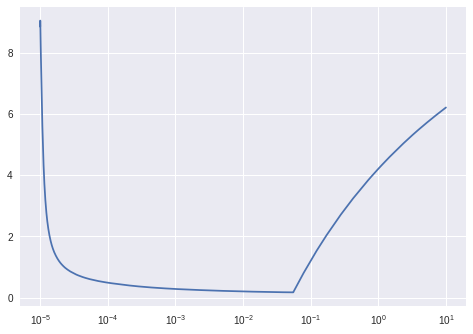

In [0]:
lr_find.plot_lr()

In [0]:
model = EmbeddingInputModel(emb_szs,len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
model.double()
criterion = F.mse_loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [0]:
m, _ = train_model(model, criterion, optimizer, dataloaders, device, dataset_sizes,num_epochs = 3, metric = exp_rmspe)

TypeError: ignored

In [0]:
print(time)

<module 'time' (built-in)>


In [0]:
model,_ = train_model(model,criterion,optimizer,dataloaders,device,dataset_sizes,num_epochs=3,metric=exp_rmspe)

Epoch 1/3
----------
train[==================================================] 100%
train Loss: 0.05821358511257641
train exp_rmspe : 0.3512703311592474
valid[====================] 100%
valid Loss: 0.031037138256636333
valid exp_rmspe : 0.3448420135034142

Epoch 2/3
----------
train[==================================================] 100%
train Loss: 0.01780013080871045
train exp_rmspe : 0.19680289560360512
valid[====================] 100%
valid Loss: 0.019434171104473378
valid exp_rmspe : 0.1942958279941374

Epoch 3/3
----------
train[==================================================] 100%
train Loss: 0.01341980577506052
train exp_rmspe : 0.19065016174147567
valid[====================] 100%
valid Loss: 0.017122062050436166
valid exp_rmspe : 0.18818418793893268

Training complete in 25.0m 4.269792318344116s
Best val loss: 0.017122062050436166


In [0]:
scheduler = SGDR(optimizer = optimizer, T_max = 6597, cycle_mult = 1)

In [0]:
model, _ = train_model(model, criterion, optimizer, dataloaders, device, dataset_sizes, 
                   scheduler = scheduler, num_epochs = 5, metric = exp_rmspe)

Epoch 1/5
----------
train[==================================================] 100%
train Loss: 0.011249272812939248
train exp_rmspe : 0.17124928783487073
valid[====================] 100%
valid Loss: 0.019014196580296648
valid exp_rmspe : 0.16950521038560168

Epoch 2/5
----------
train[==================================================] 100%
train Loss: 0.010742842876987598
train exp_rmspe : 0.18218530603907573
valid[====================] 100%
valid Loss: 0.018334646237081795
valid exp_rmspe : 0.1800082115404084

Epoch 3/5
----------
train[==================================================] 100%
train Loss: 0.010255857253490168
train exp_rmspe : 0.1722745542995786
valid[====================] 100%
valid Loss: 0.017898803657721982
valid exp_rmspe : 0.17038533857127527

Epoch 4/5
----------
train[==================================================] 100%
train Loss: 0.009874827463574522
train exp_rmspe : 0.16717239288552696
valid[====================] 100%
valid Loss: 0.016982060340941872
v